# 1. Veri Setini Yükleme ve Ön İnceleme

In [9]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Seaborn'dan tips veri setini yükleme
tips = sns.load_dataset('tips')

# İlk 5 satırı görüntüleme
print(tips.head())

# Veri setinin genel bilgisi
print(tips.info())

# Eksik veri kontrolü
print(tips.isnull().sum())


   total_bill   tip     sex smoker  day    time  size
0       16.99  1.01  Female     No  Sun  Dinner     2
1       10.34  1.66    Male     No  Sun  Dinner     3
2       21.01  3.50    Male     No  Sun  Dinner     3
3       23.68  3.31    Male     No  Sun  Dinner     2
4       24.59  3.61  Female     No  Sun  Dinner     4
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.4 KB
None
total_bill    0
tip           0
sex           0
smoker        0
day           0
time          0
size          0
dtype: int64


# 2. Toplam Hesap (total_bill) ve Bahşiş (tip) Arasındaki İlişki


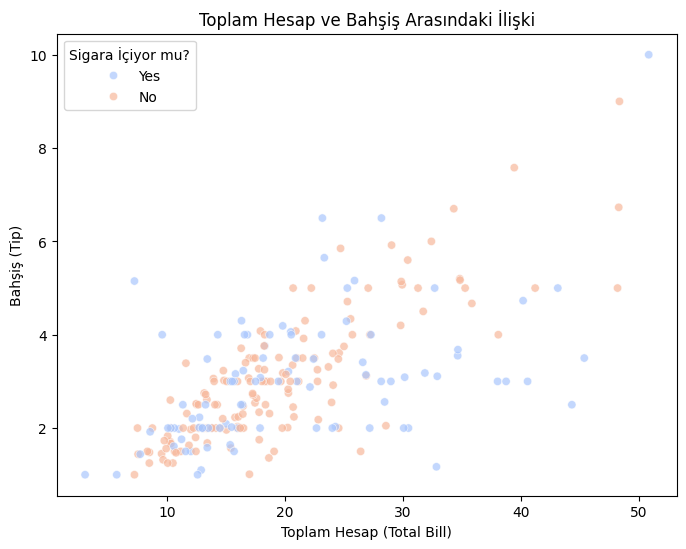

In [22]:
# Scatter plot: total_bill ve tip arasındaki ilişki
plt.figure(figsize=(8, 6))
sns.scatterplot(data=tips, x='total_bill', y='tip', hue='smoker', palette='coolwarm', alpha=0.7)
plt.title('Toplam Hesap ve Bahşiş Arasındaki İlişki')
plt.xlabel('Toplam Hesap (Total Bill)')
plt.ylabel('Bahşiş (Tip)')
plt.legend(title='Sigara İçiyor mu?')
plt.show()


Yorum:
Grafikten görülebileceği gibi, toplam hesap arttıkça genellikle bahşiş miktarı da artıyor. Sigara içen ve içmeyen gruplar arasında belirgin bir fark görünmüyor.

# 3. Günlere Göre Toplam Hesap Dağılımı

<ipython-input-11-b728ba9e1cda>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=tips, x='day', y='total_bill', palette='pastel')


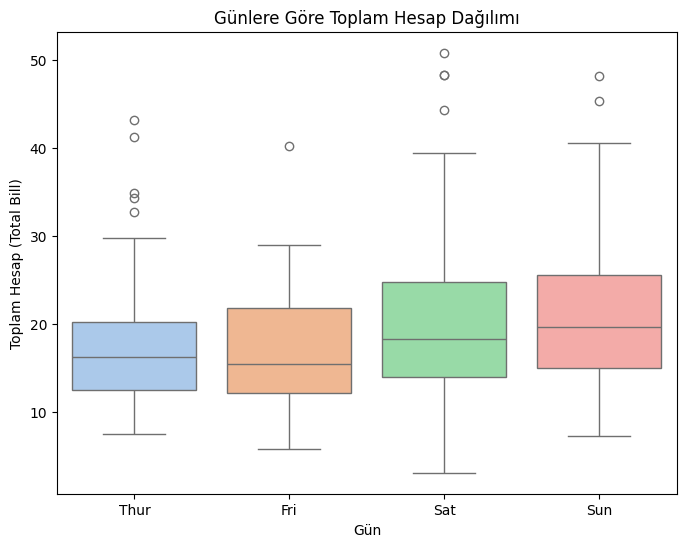

In [11]:
# Günlere göre toplam hesap boxplot
plt.figure(figsize=(8, 6))
sns.boxplot(data=tips, x='day', y='total_bill', palette='pastel')
plt.title('Günlere Göre Toplam Hesap Dağılımı')
plt.xlabel('Gün')
plt.ylabel('Toplam Hesap (Total Bill)')
plt.show()


Yorum:

Cumartesi ve Pazar günlerinde toplam hesap tutarlarının daha yüksek olduğu gözlemleniyor.
Perşembe günlerinde daha düşük toplam hesaplar var.

# 4. Masa Büyüklüğüne Göre Bahşiş Oranları

<ipython-input-26-98ba339c9cc0>:6: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=tips, x='size', y='tip_rate', ci=None, palette='viridis')
<ipython-input-26-98ba339c9cc0>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=tips, x='size', y='tip_rate', ci=None, palette='viridis')


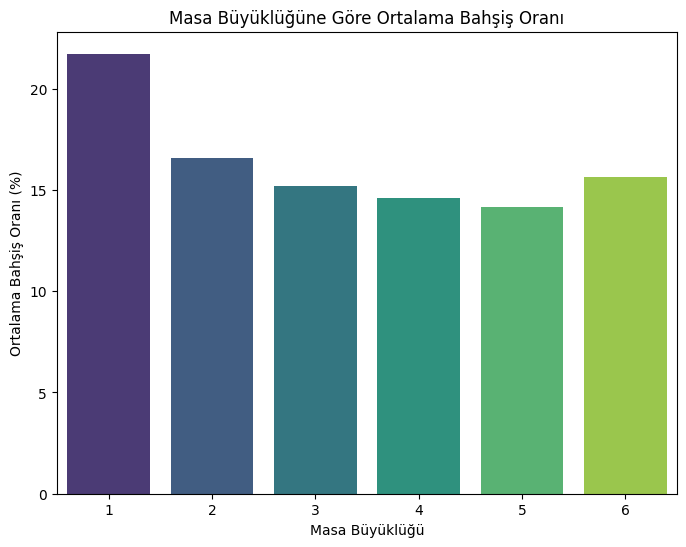

In [26]:
# Bahşiş oranı sütunu ekleme
tips['tip_rate'] = (tips['tip'] / tips['total_bill']) * 100

# Masa büyüklüğüne göre bahşiş oranı
plt.figure(figsize=(8, 6))
sns.barplot(data=tips, x='size', y='tip_rate', ci=None, palette='viridis')
plt.title('Masa Büyüklüğüne Göre Ortalama Bahşiş Oranı')
plt.xlabel('Masa Büyüklüğü')
plt.ylabel('Ortalama Bahşiş Oranı (%)')
plt.show()


Yorum:

Daha küçük masa büyüklüklerinde bahşiş oranı daha yüksektir.
Masa büyüklüğü arttıkça bahşiş oranı düşme eğilimindedir.

# 5. Günün Zamanına Göre Bahşiş Dağılımı

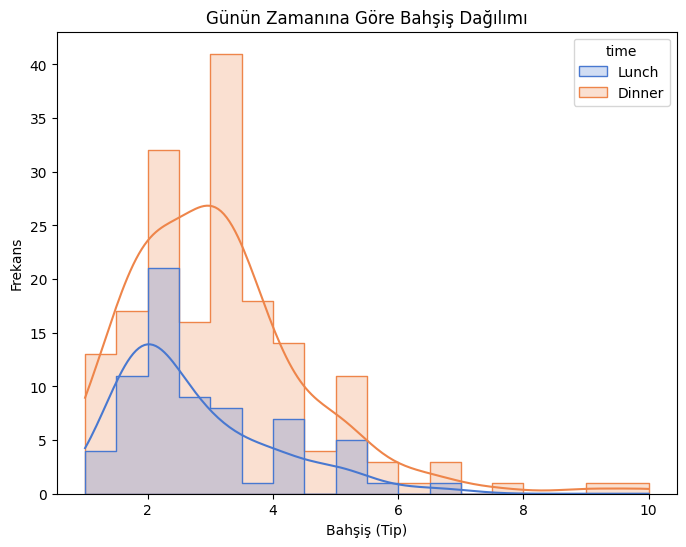

In [5]:
# Lunch ve Dinner zamanına göre bahşiş dağılımı
plt.figure(figsize=(8, 6))
sns.histplot(data=tips, x='tip', hue='time', kde=True, palette='muted', element='step')
plt.title('Günün Zamanına Göre Bahşiş Dağılımı')
plt.xlabel('Bahşiş (Tip)')
plt.ylabel('Frekans')
plt.show()


Yorum:

Akşam yemeği (Dinner) zamanında verilen bahşişler daha yüksek.
Öğle yemeğinde (Lunch) daha düşük bahşişler veriliyor.

# 6. Korelasyon Matrisi ve Heatmap

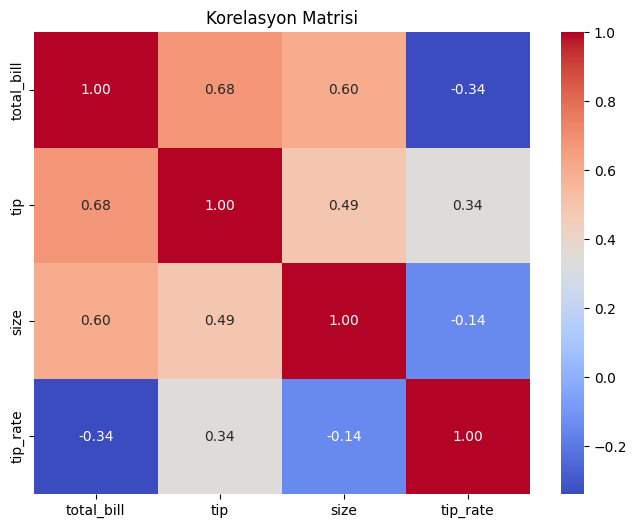

In [20]:
# Sadece sayısal sütunları seçme
numerical_tips = tips.select_dtypes(include=['number'])

# Korelasyon matrisi hesaplama
correlation_matrix = numerical_tips.corr()

# Korelasyon matrisi görselleştirme
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Korelasyon Matrisi')
plt.show()


Yorum:

Toplam hesap (total_bill) ve bahşiş (tip) arasında yüksek pozitif korelasyon vardır.
Masa büyüklüğü (size) ve toplam hesap arasında da pozitif korelasyon görülmektedir.